# RNN 기본 구조와 Keras를 사용한 RNN 구현

신경망을 사용하여 문장(sentence)이나 시계열(time series) 데이터와 같은 순서열(sequence)를 예측하는 문제를 푸는 경우, 예측하고자 하는 값이 더 오랜 과거의 데이터에 의존하게 하려면 시퀀스를 나타내는 벡터의 크기를 증가시켜야 한다. 예를 들어 10,000개의 단어로 구성된 단어장을 사용하는 언어 모형에서 과거 100개 단어의 순서열에 대해 출력을 예측하려면 1,000,000 차원의 입력 벡터가 필요하다. 

RNN(Recurrent Neural Network)는 뉴런의 상태(state)를 저장하고 이를 다음 스텝에서의 입력으로 사용함으로써 긴 순서열에 대해서도 예측을 할 수 있는 신경망 구조이다. 여기에서는 RNN의 기본 구조와 Keras 파이썬 패키지에서 지원하는 RNN 구현 방법에 대해 알아본다.

## RNN의 기본 구조

일반적인 feedforward 신경망 구조는 다음과 같이 출력 벡터 $y$가 입력 $x$ 벡터와 신경망 가중치 행렬 $U$의 곱에 activation 함수를 적용한 결과로 나타난다.

$$ \sigma ( U x ) $$

이 식에서 $\sigma$는 activation 함수를 뜻한다.


하나의 은닉층(hidden layer)을 가지는 MLP(Multi-Layer Perceptron)의 경우에는 다음과 같이 표현할 수 있다.

$$ h = \sigma(U x) $$
$$ o = \sigma(V h) $$

이 식에서 $h$는 은닉층 벡터, $o$은 출력 벡터, $U$는 입력으로부터 은닉층까지의 가중치 행렬, $V$는 은닉층으로부터 츨력까지의 가중치 행렬이다.

RNN에서는 출력 벡터 $o$ 이외에도 상태 벡터 $s$를 출력한다. 상태 벡터는 일종의 은닉층 벡터와 비슷하지만 입력 $x$ 뿐 아니라 바로 전단계의 상태 벡터 값에도 의존한다. 출력 벡터는 상태 벡터의 값에 의존한다.

$$ s_t = \sigma(Ux_t + Ws_{t-1}) $$
$$ o_t = \sigma(Vs_t) $$

여기에서 첨자 $t$는 순서열의 순서를 나타낸다. RNN은 시간 스텝에 따라 연결해서 펼쳐놓으면 무한개의 은닉층을 가진 MLP와 유사한 효과가 있다. 그림으로 나타내면 다음과 같다.

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/rnn.jpg" style="width: 80%;">

<small>이미지 출처: http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/</small>

다만 MLP와 달리 상태 벡터의 변환 행렬이 고정되어 있다.

## 순서열 예측

RNN이 기존 신경망과 가장 다른 점은 순서열을 처리할 수 있다는 점이다. RNN에 입력 벡터 순서열 $x_1, x_2, \ldots, x_n$ 을 차례대로 입력하면 상태 순서열 $s_1, s_2, \ldots, s_n$이 내부적으로 생성되고 출력으로는 출력 순서열 $o_1, o_2, \ldots, o_n$ 이 나온다.

만약 원하는 결과가 출력 순서열 $o_1, o_2, \ldots, o_n$ 이 target 순서열 $y_1, y_2, \ldots, y_n$ 과 같아지는 것이라면 입력 순서열 길이와 출력 순서열 길이가 같은 특수한 경우의 sequnce-to-sequence (many-to-many) 예측 문제가 되고 순서열의 마지막 출력 $o_n$ 값이 $y_n$값과 같아지는 것만 목표라면 단순한 sequence to value (many-to-one) 문제가 된다.

<img src="https://deeplearning4j.org/img/rnn_masking_1.png" style="width: 100%;">

<small>이미지 출처: https://deeplearning4j.org/usingrnns</small>

## Back-Propagation Through Time (BPTT)

RNN은 시간에 따라 펼쳐놓으면 구조가 MLP와 유사하기 때문에 Back-Propagation 방법으로 gradient를 계산할 수 있다. 다만 실제로 여러개의 은닉층이 있는 것이 아니라 시간 차원에서 존재하기 때문에 Back-Propagation Through Time (BPTT) 방법이라고 한다.

## Keras를 사용한 RNN  구현

파이썬용 신경망 패키지인 Keras를 사용해서 RNN을 구현해 보자. Keras 는 theano 나 tensorflow 를 사용하여 신경망을 구현해 줄 수 있도록 하는 고수준 라이브러리다. 

Keras 는 다양한 형태의 신경망 구조를 블럭 형태로 제공하고 있으며 SimpleRNN, LSTM, GRU 와 같은 RNN 구조도 제공한다. Keras에서 제공하는 RNN 에 대한 자세한 내용은 다음을 참조한다.

* https://keras.io/layers/recurrent/

## 시계열 예측 문제

풀어야 할 문제는 다음과 같은 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측하는 단순한 시계열 예측 문제이다.

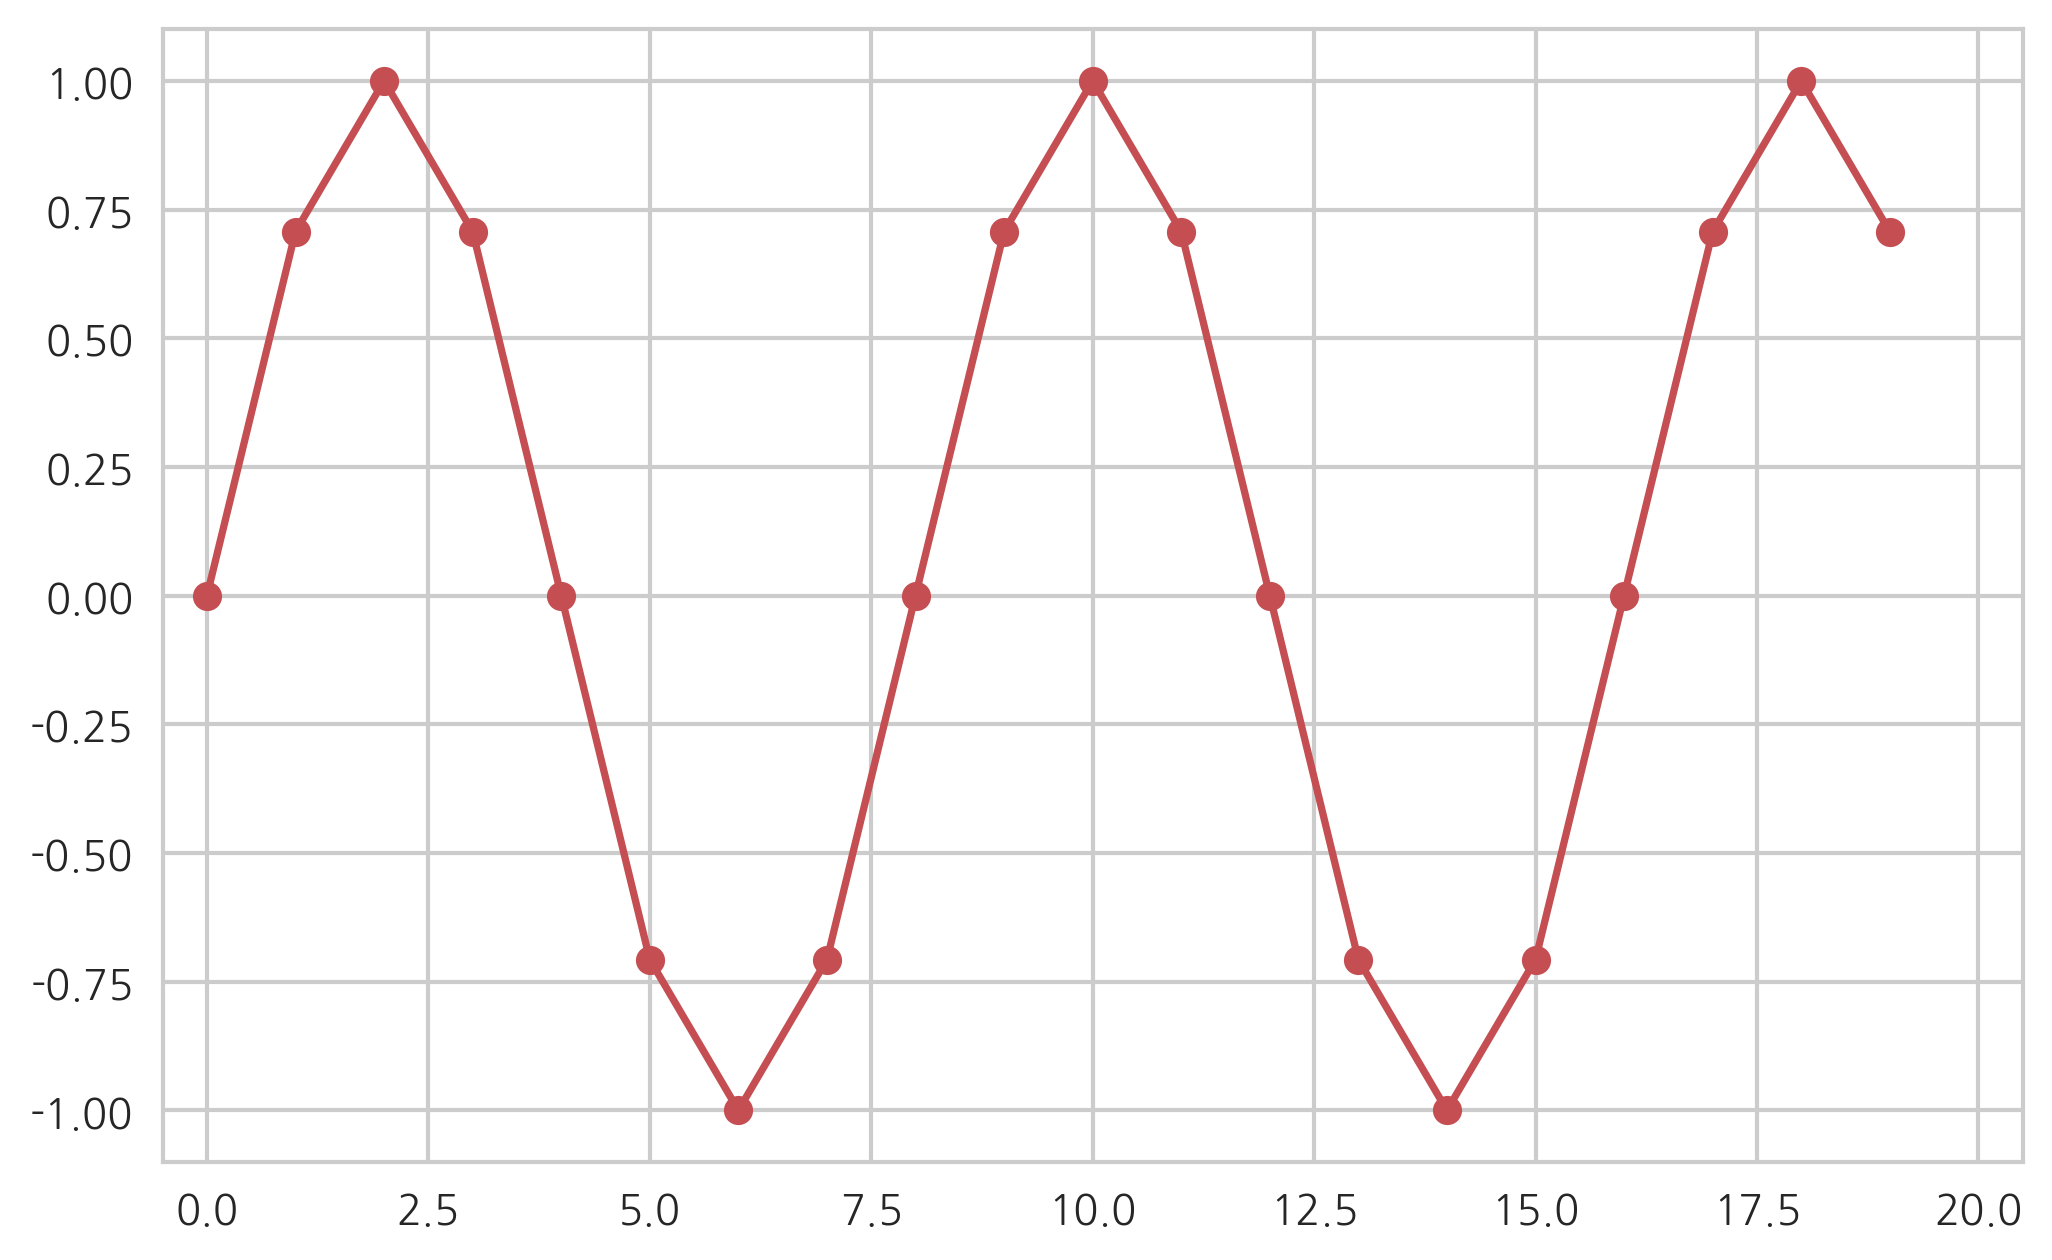

In [1]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()

이 시계열 자료에서 입력 순서열과 target 값을 만든다. 입력 순서열은 3 스텝 크기의 순서열을 사용하고 target으로는 그 다음 시간 스텝의 값을 사용한다. 즉, 3개의 순서열을 입력한 다음 마지막 출력값이 target과 일치하게 만드는 sequence-to-value (many-to-one) 문제를 풀어보도록 한다.

Keras 에서 RNN 을 사용하려면 입력 데이터는 `(nb_samples, timesteps, input_dim)` 크기를 가지는 ndim=3인 3차원 텐서(tensor) 형태이어야 한다.

* `nb_samples`: 자료의 수
* `timesteps`: 순서열의 길이
* `input_dim`: x 벡터의 크기

여기에서는 단일 시계열이므로  `input_dim` = 1 이고 3 스텝 크기의 순서열을 사용하므로 `timesteps` = 3 이며 자료의 수는 18 개이다.

다음코드와 같이 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환하여 3차원 텐서를 만든다.

In [2]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [3]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [4]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [5]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

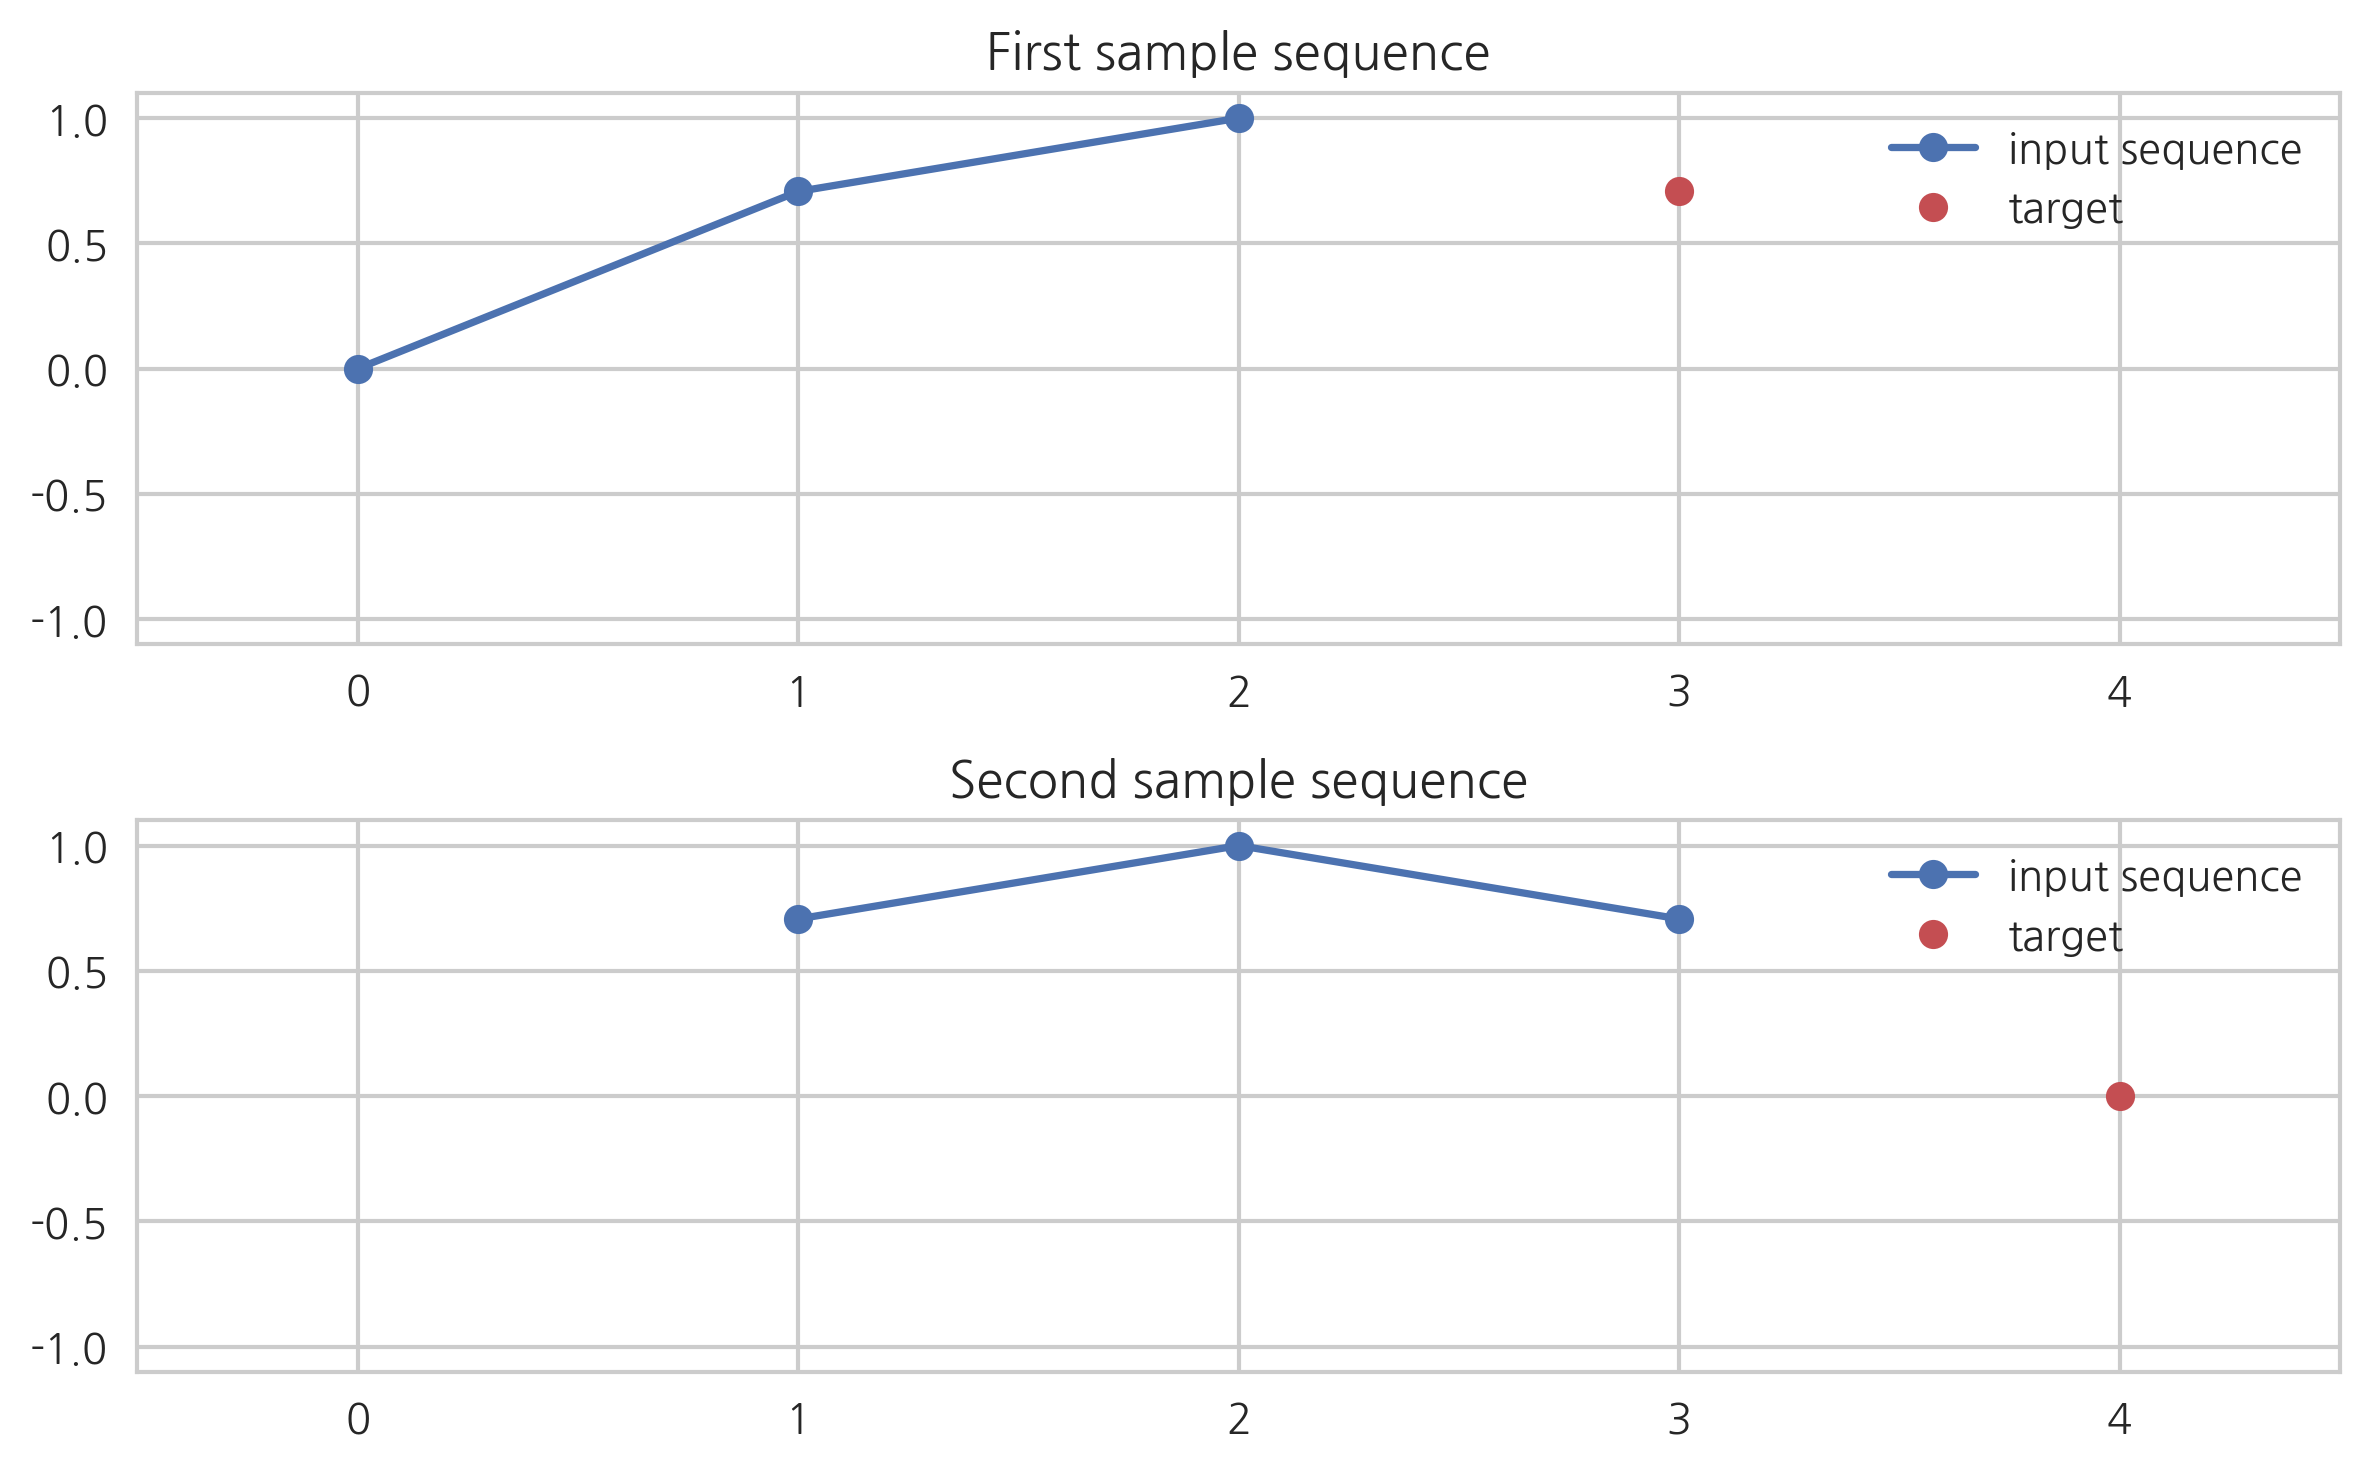

In [6]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

## Keras의 SimpleRNN 클래스

Keras에서 신경망 모형은 다음과 같은 순서로 만든다.

1. `Sequential` 클래스 객체인 모형을 생성한다.
2. `add` 메서드로 다양한 레이어를 추가한다.
3. `compile` 메서드로 목적함수 및 최적화 방법을 지정한다.
4. `fit` 메서드로 가중치를 계산한다.

우선 가장 단순한 신경망 구조인 `SimpleRNN` 클래스를 사용하는 방법은 다음 코드와 같다. 

여기에서는 `SimpleRNN` 클래스 객체로 10개의 뉴런을 가지는 RNN 층을 만든다. 첫번째 인수로는 뉴런의 크기, `input_dim` 인수로는 벡터의 크기, `input_length` 인수로는 순서열으 길이를 입력한다.

그 다음으로 `SimpleRNN` 클래스 객체에서 나오는 10개의 출력값을 하나로 묶어 실수 값을 출력으로 만들기 위해 `Dense` 클래스 객체를 추가하였다.

손실 함수로는 mean-squred-error를, 최적화 방법으로는 단순한 stochastic gradient descent 방법을 사용한다.

In [13]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='sgd')

일단 학습을 시키기 이전에 나오는 출력을 살펴보자. 

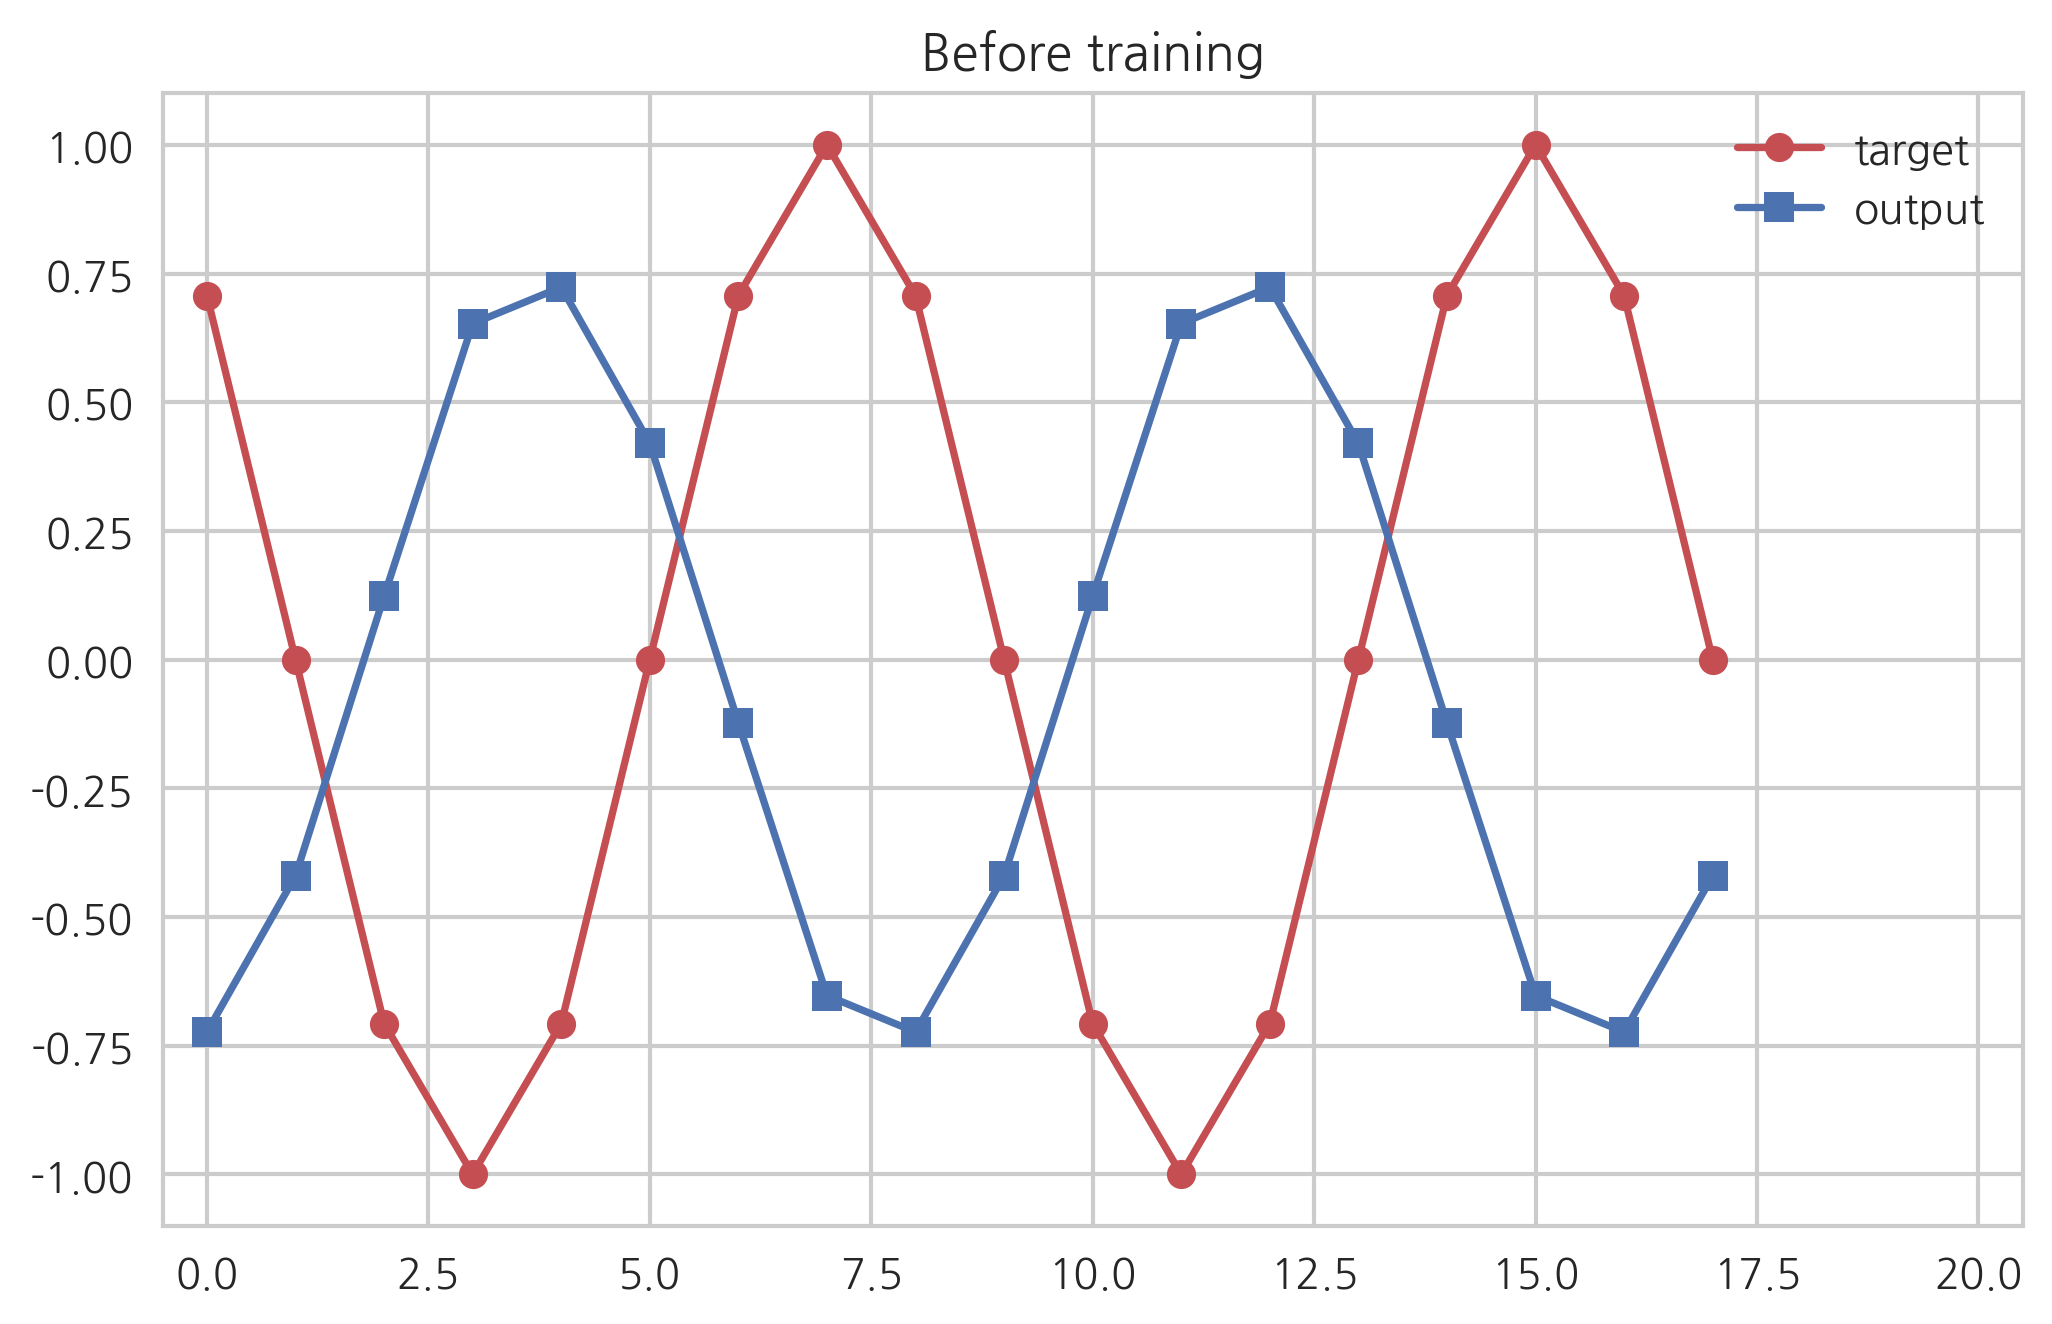

In [14]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

`fit` 메서드로 학습을 한다.

In [15]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)

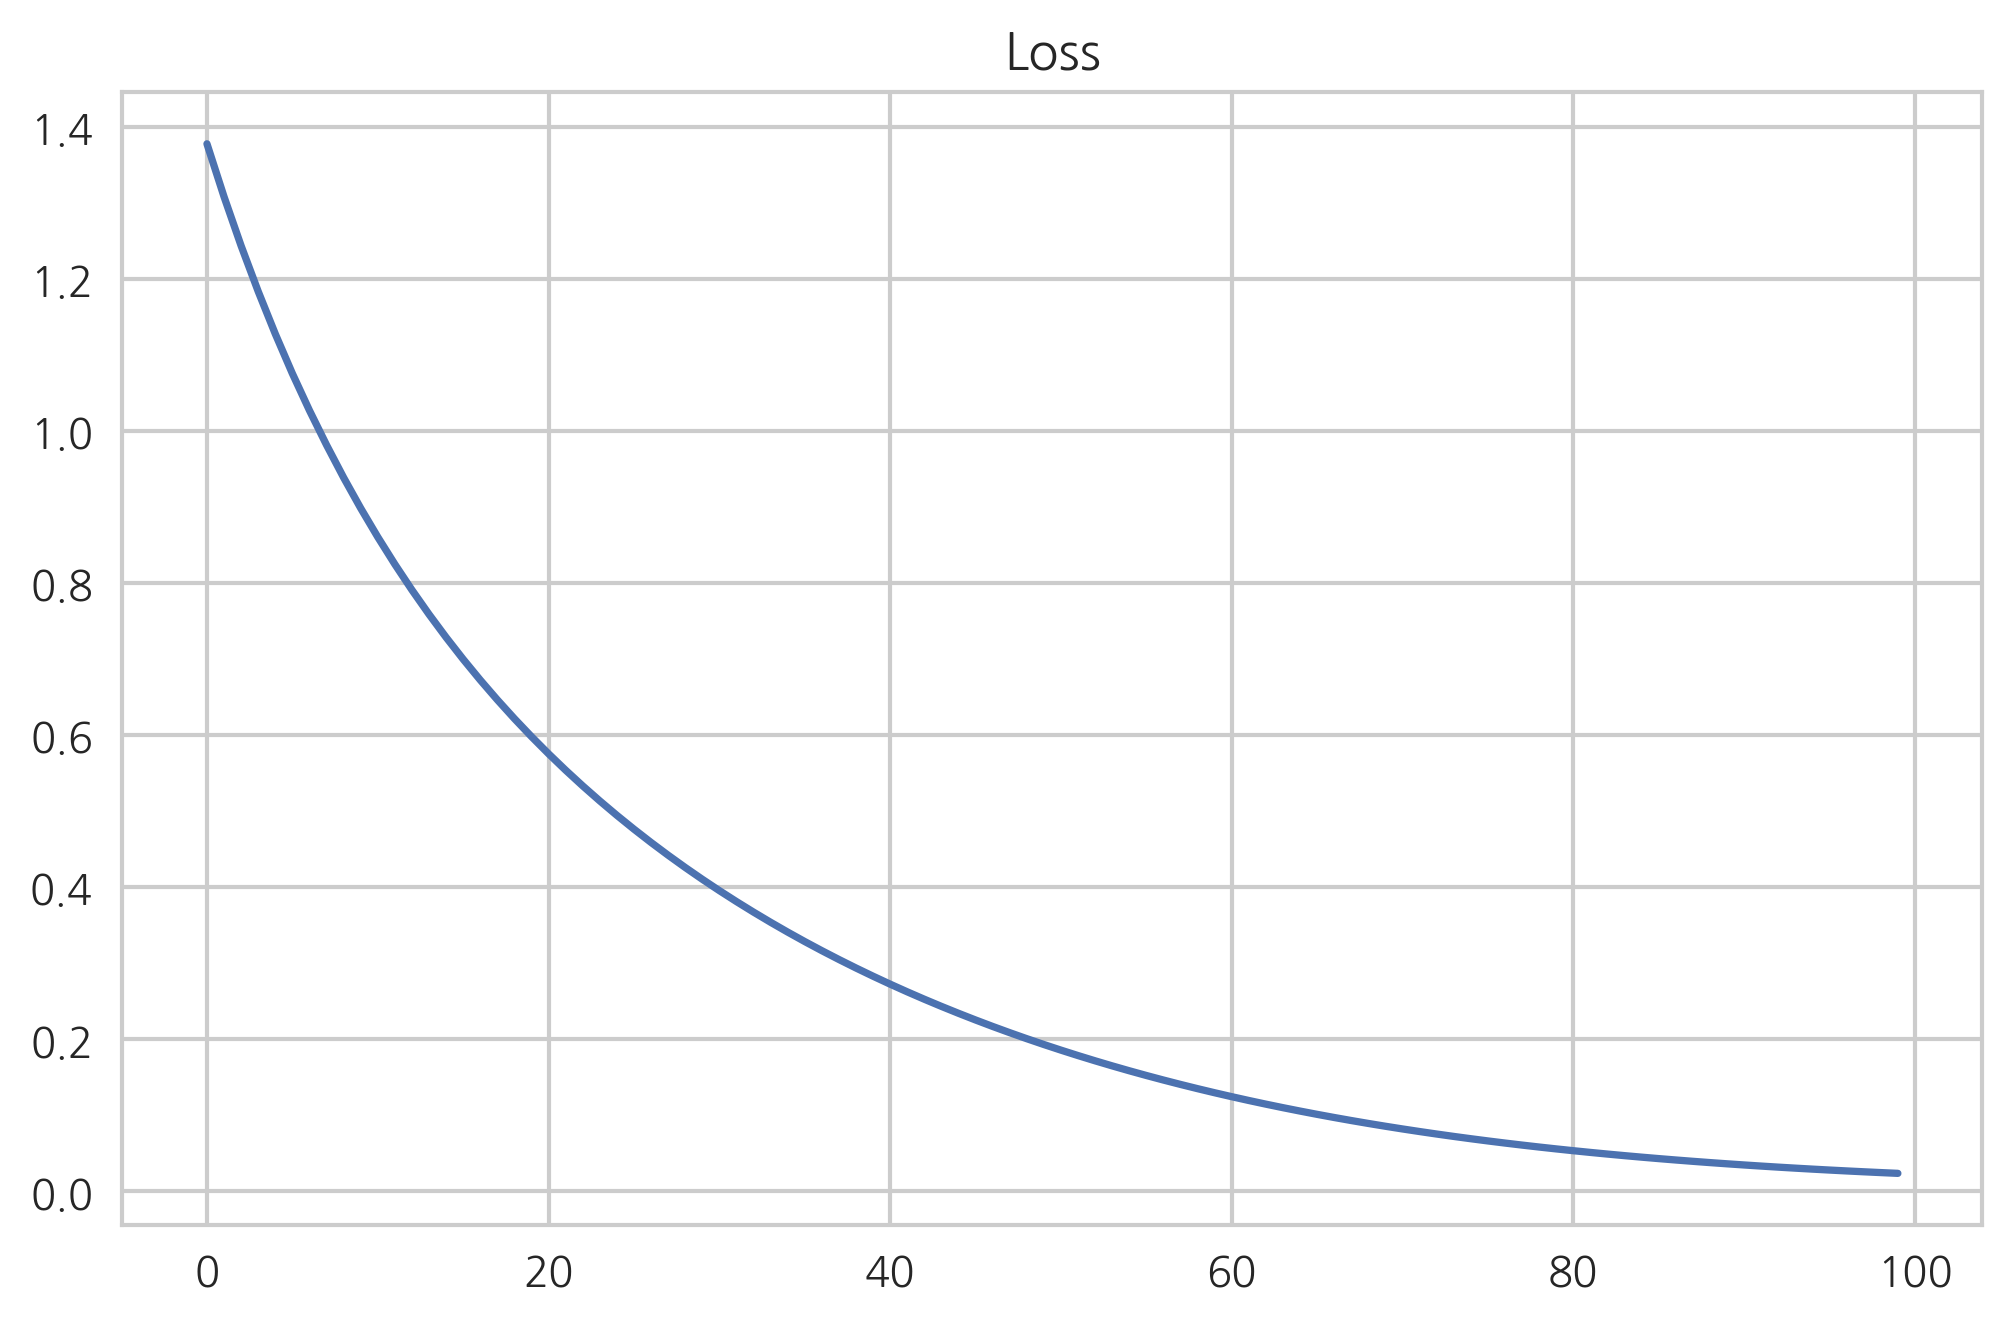

In [16]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

학습을 마친 후의 출력은 다음과 같다.

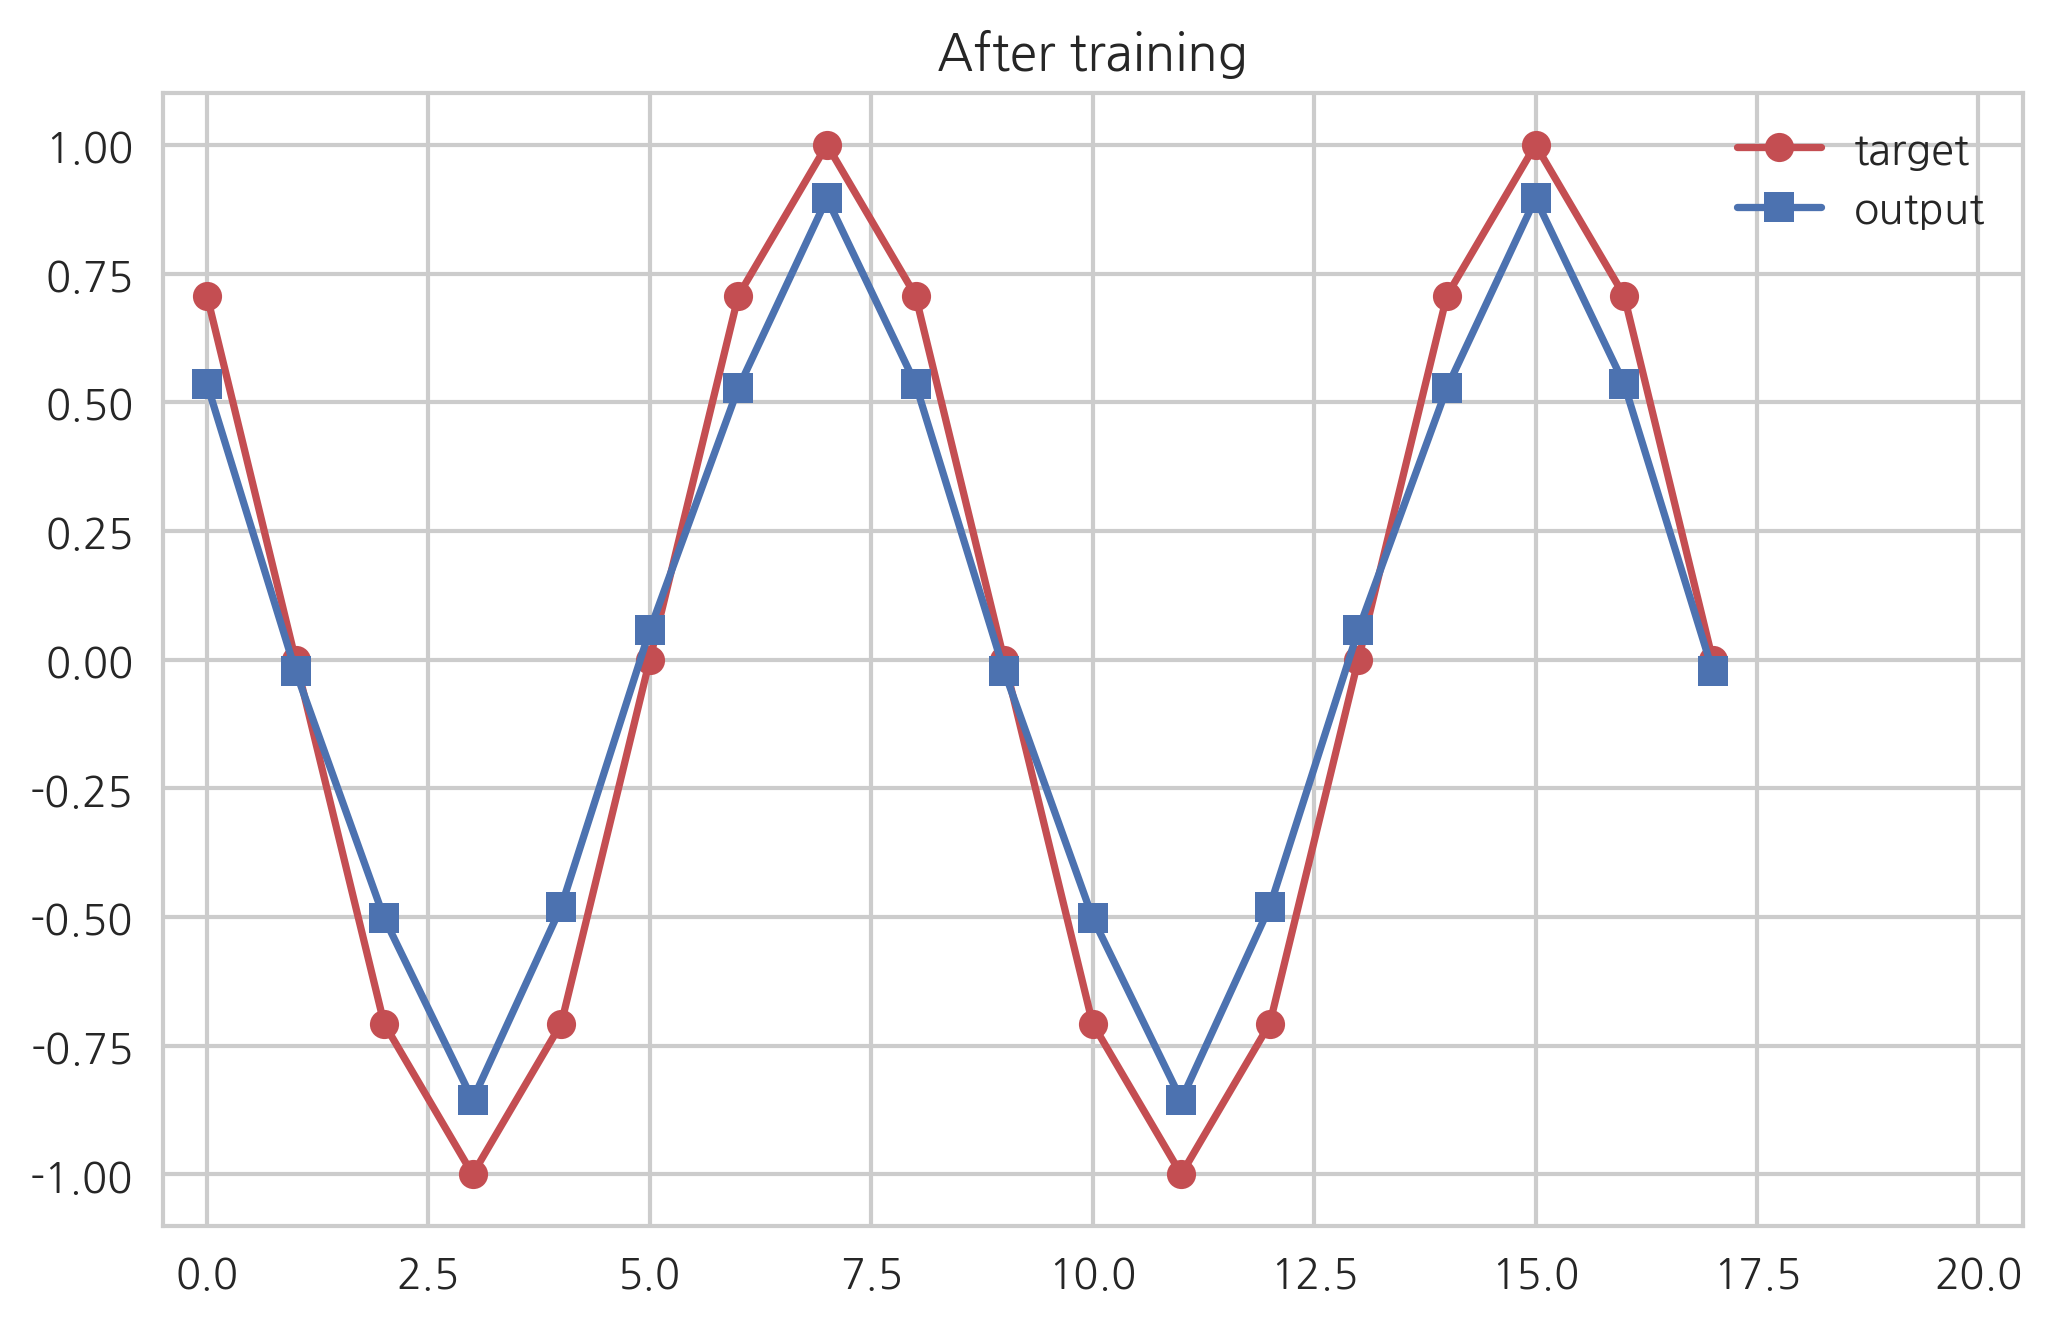

In [17]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

`SimpleRNN` 클래스 생성시 `return_sequences` 인수를 `True`로 하면 출력 순서열 중 마지막 값만 출력하는 것이 아니라 전체 순서열을 3차원 텐서 형태로 출력하므로 sequence-to-sequence 문제로 풀 수 있다. 다만 입력 순서열과 출력 순서열의 크기는 같아야 한다.

다만 이 경우에는 다음에 오는 `Dense` 클래스 객체를 `TimeDistributed` wrapper를 사용하여 3차원 텐서 입력을 받을 수 있게 확장해 주어야 한다.

In [18]:
from keras.layers import TimeDistributed

model2 = Sequential()
model2.add(SimpleRNN(10, return_sequences=True, input_shape=(3, 1)))
model2.add(TimeDistributed(Dense(1, activation="linear")))
model2.compile(loss='mse', optimizer='sgd')

이 번에는 출력값도 3개짜리 순서열로 한다.

In [19]:
X_train2 = S[:-3, 0:3][:, :, np.newaxis]
Y_train2 = S[:-3, 3:6][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((16, 3, 1), (16, 3, 1))

In [20]:
X_train2[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [21]:
Y_train2[:4]

array([[[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]],

       [[ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00]],

       [[-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01]],

       [[-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16]]])

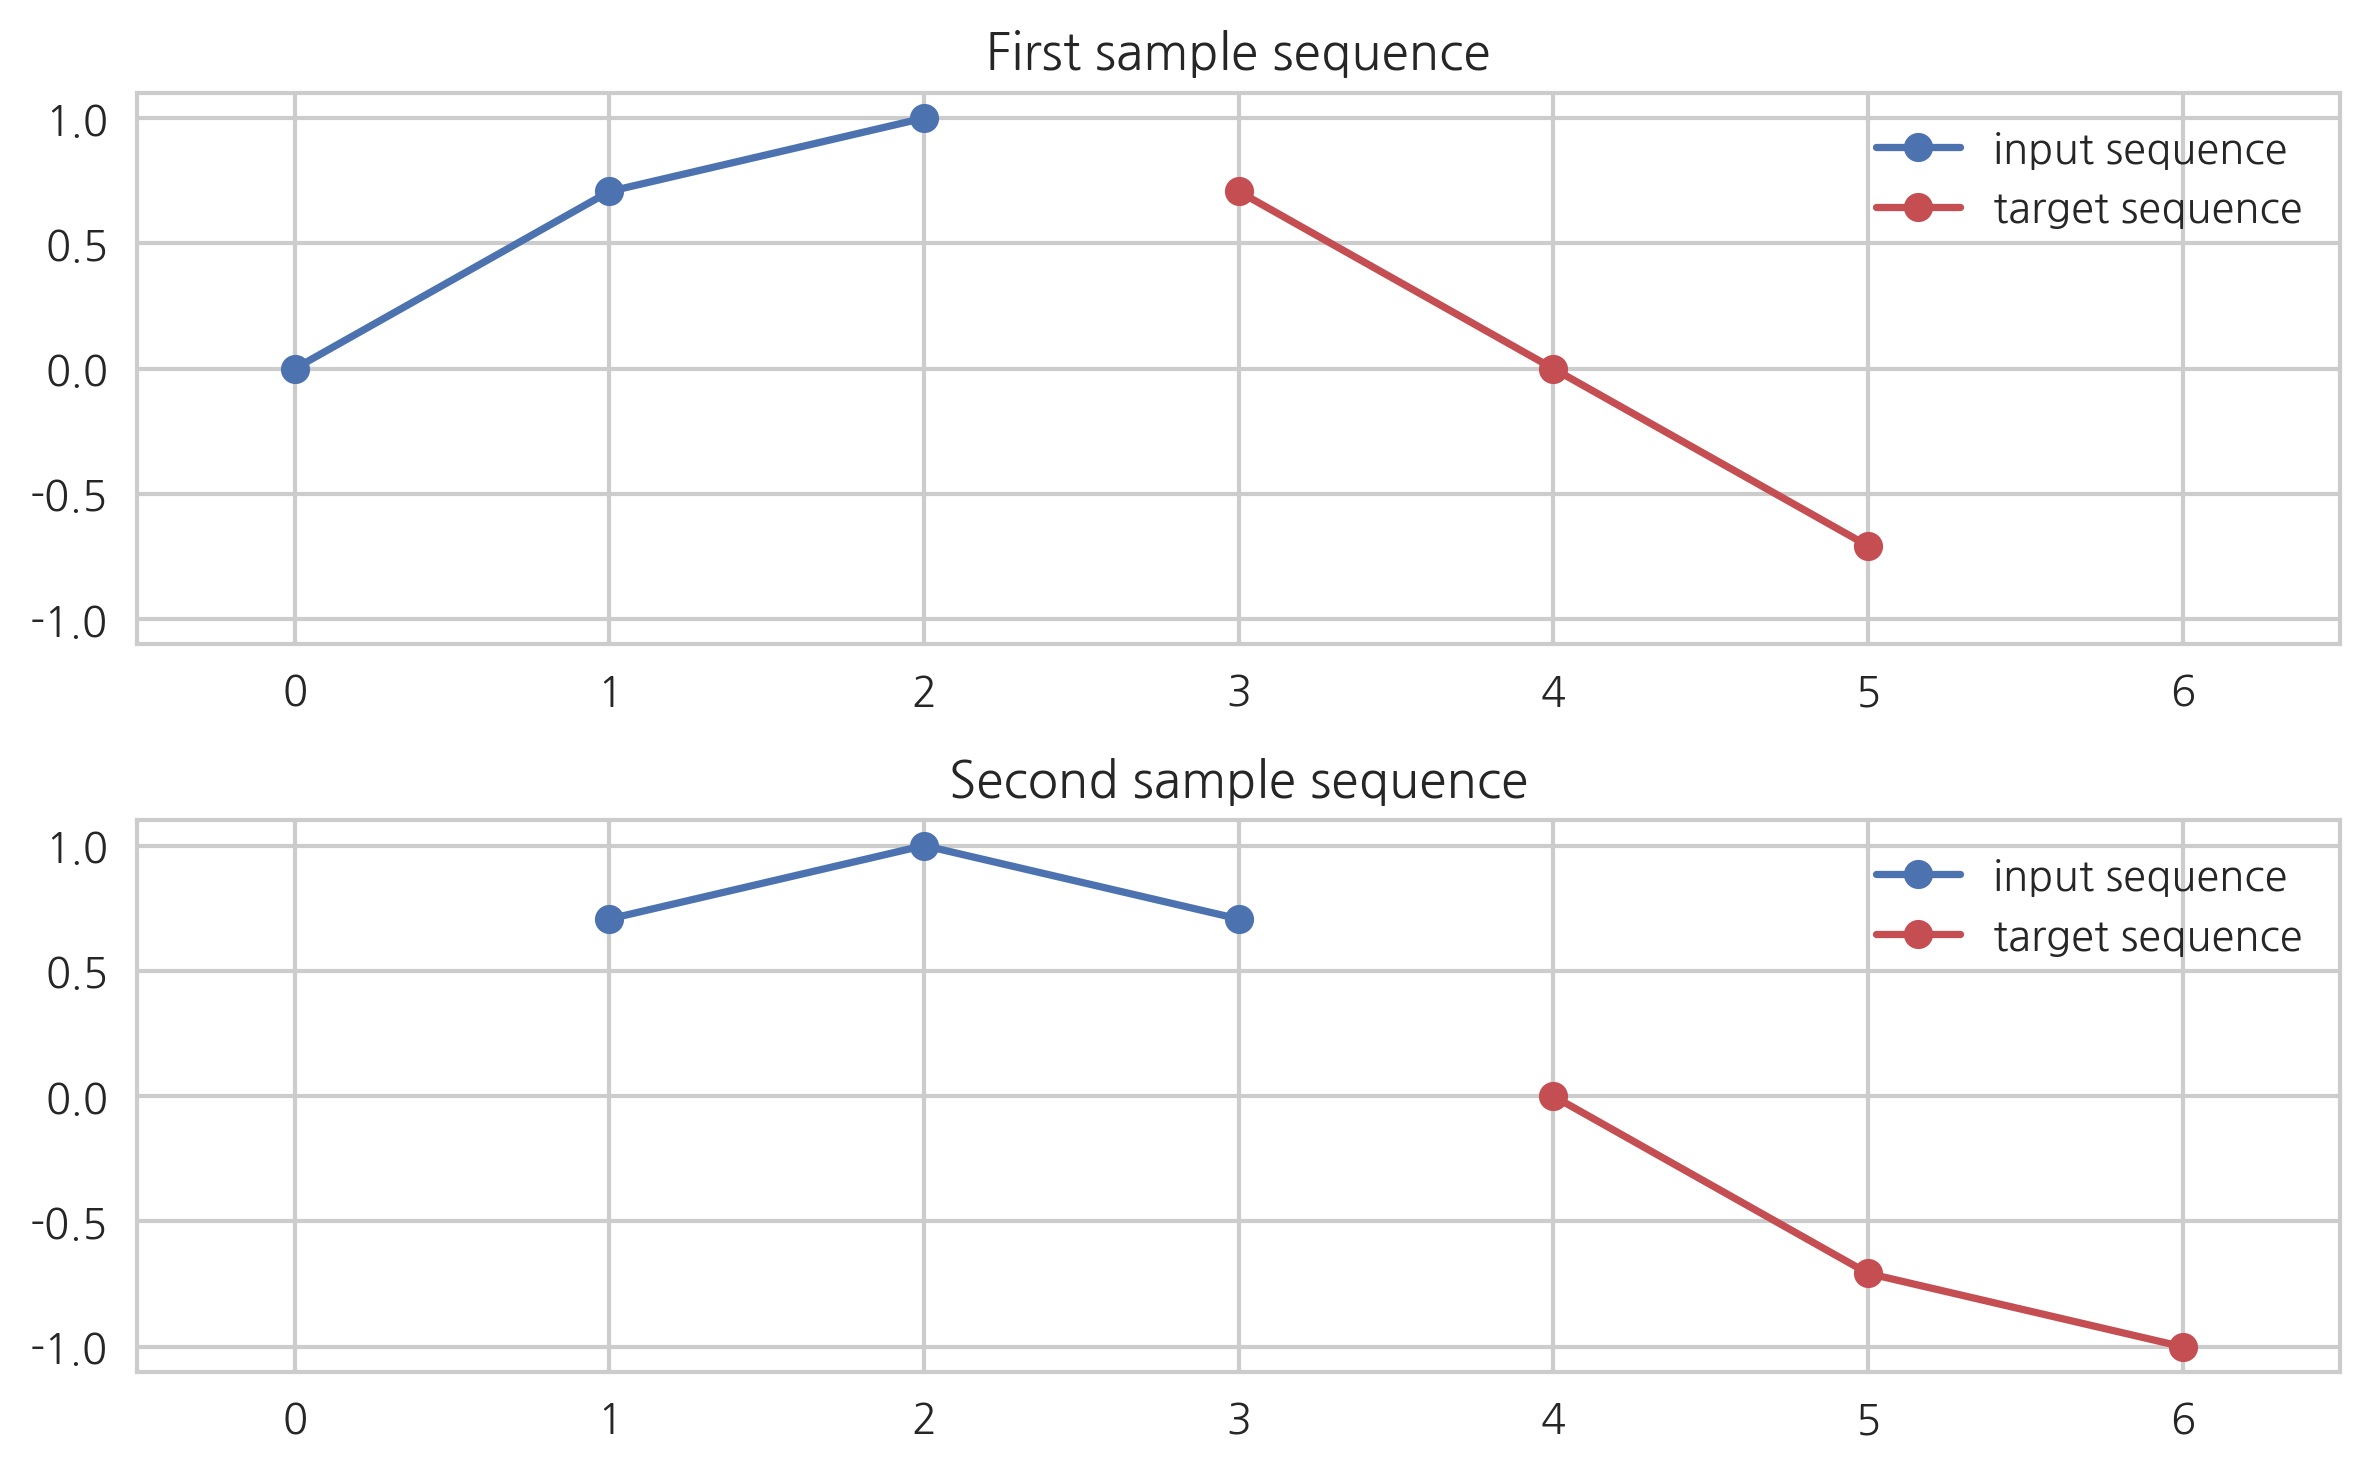

In [22]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train2[0].flatten(), 'bo-', label="input sequence")
plt.plot([3, 4, 5], Y_train2[0].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [23]:
history2 = model2.fit(X_train2, Y_train2, epochs=100, verbose=0)

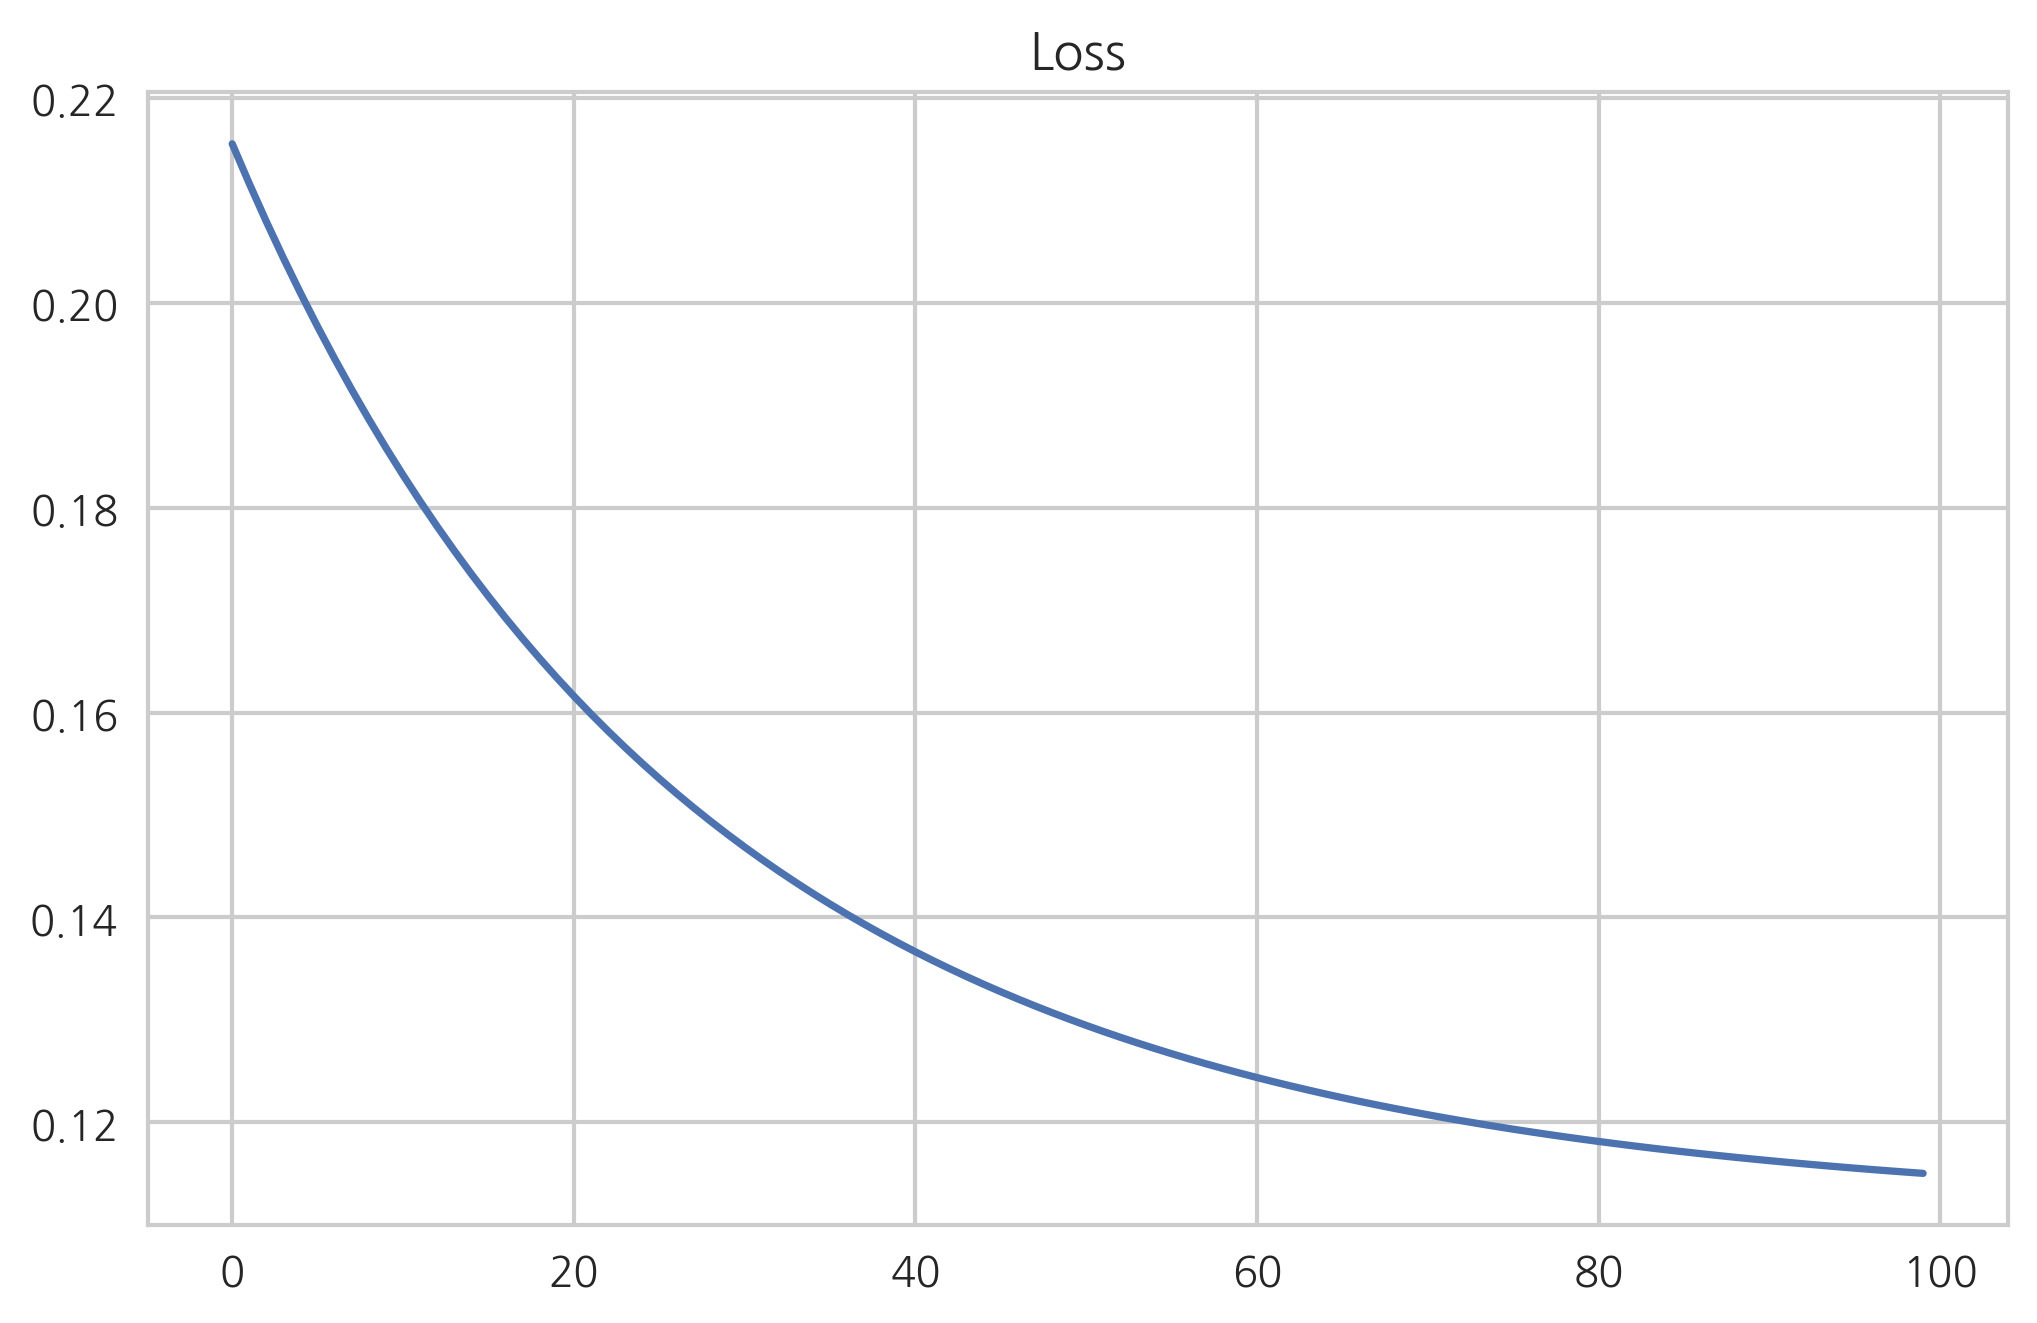

In [24]:
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.show()

학습 결과는 다음과 같다.

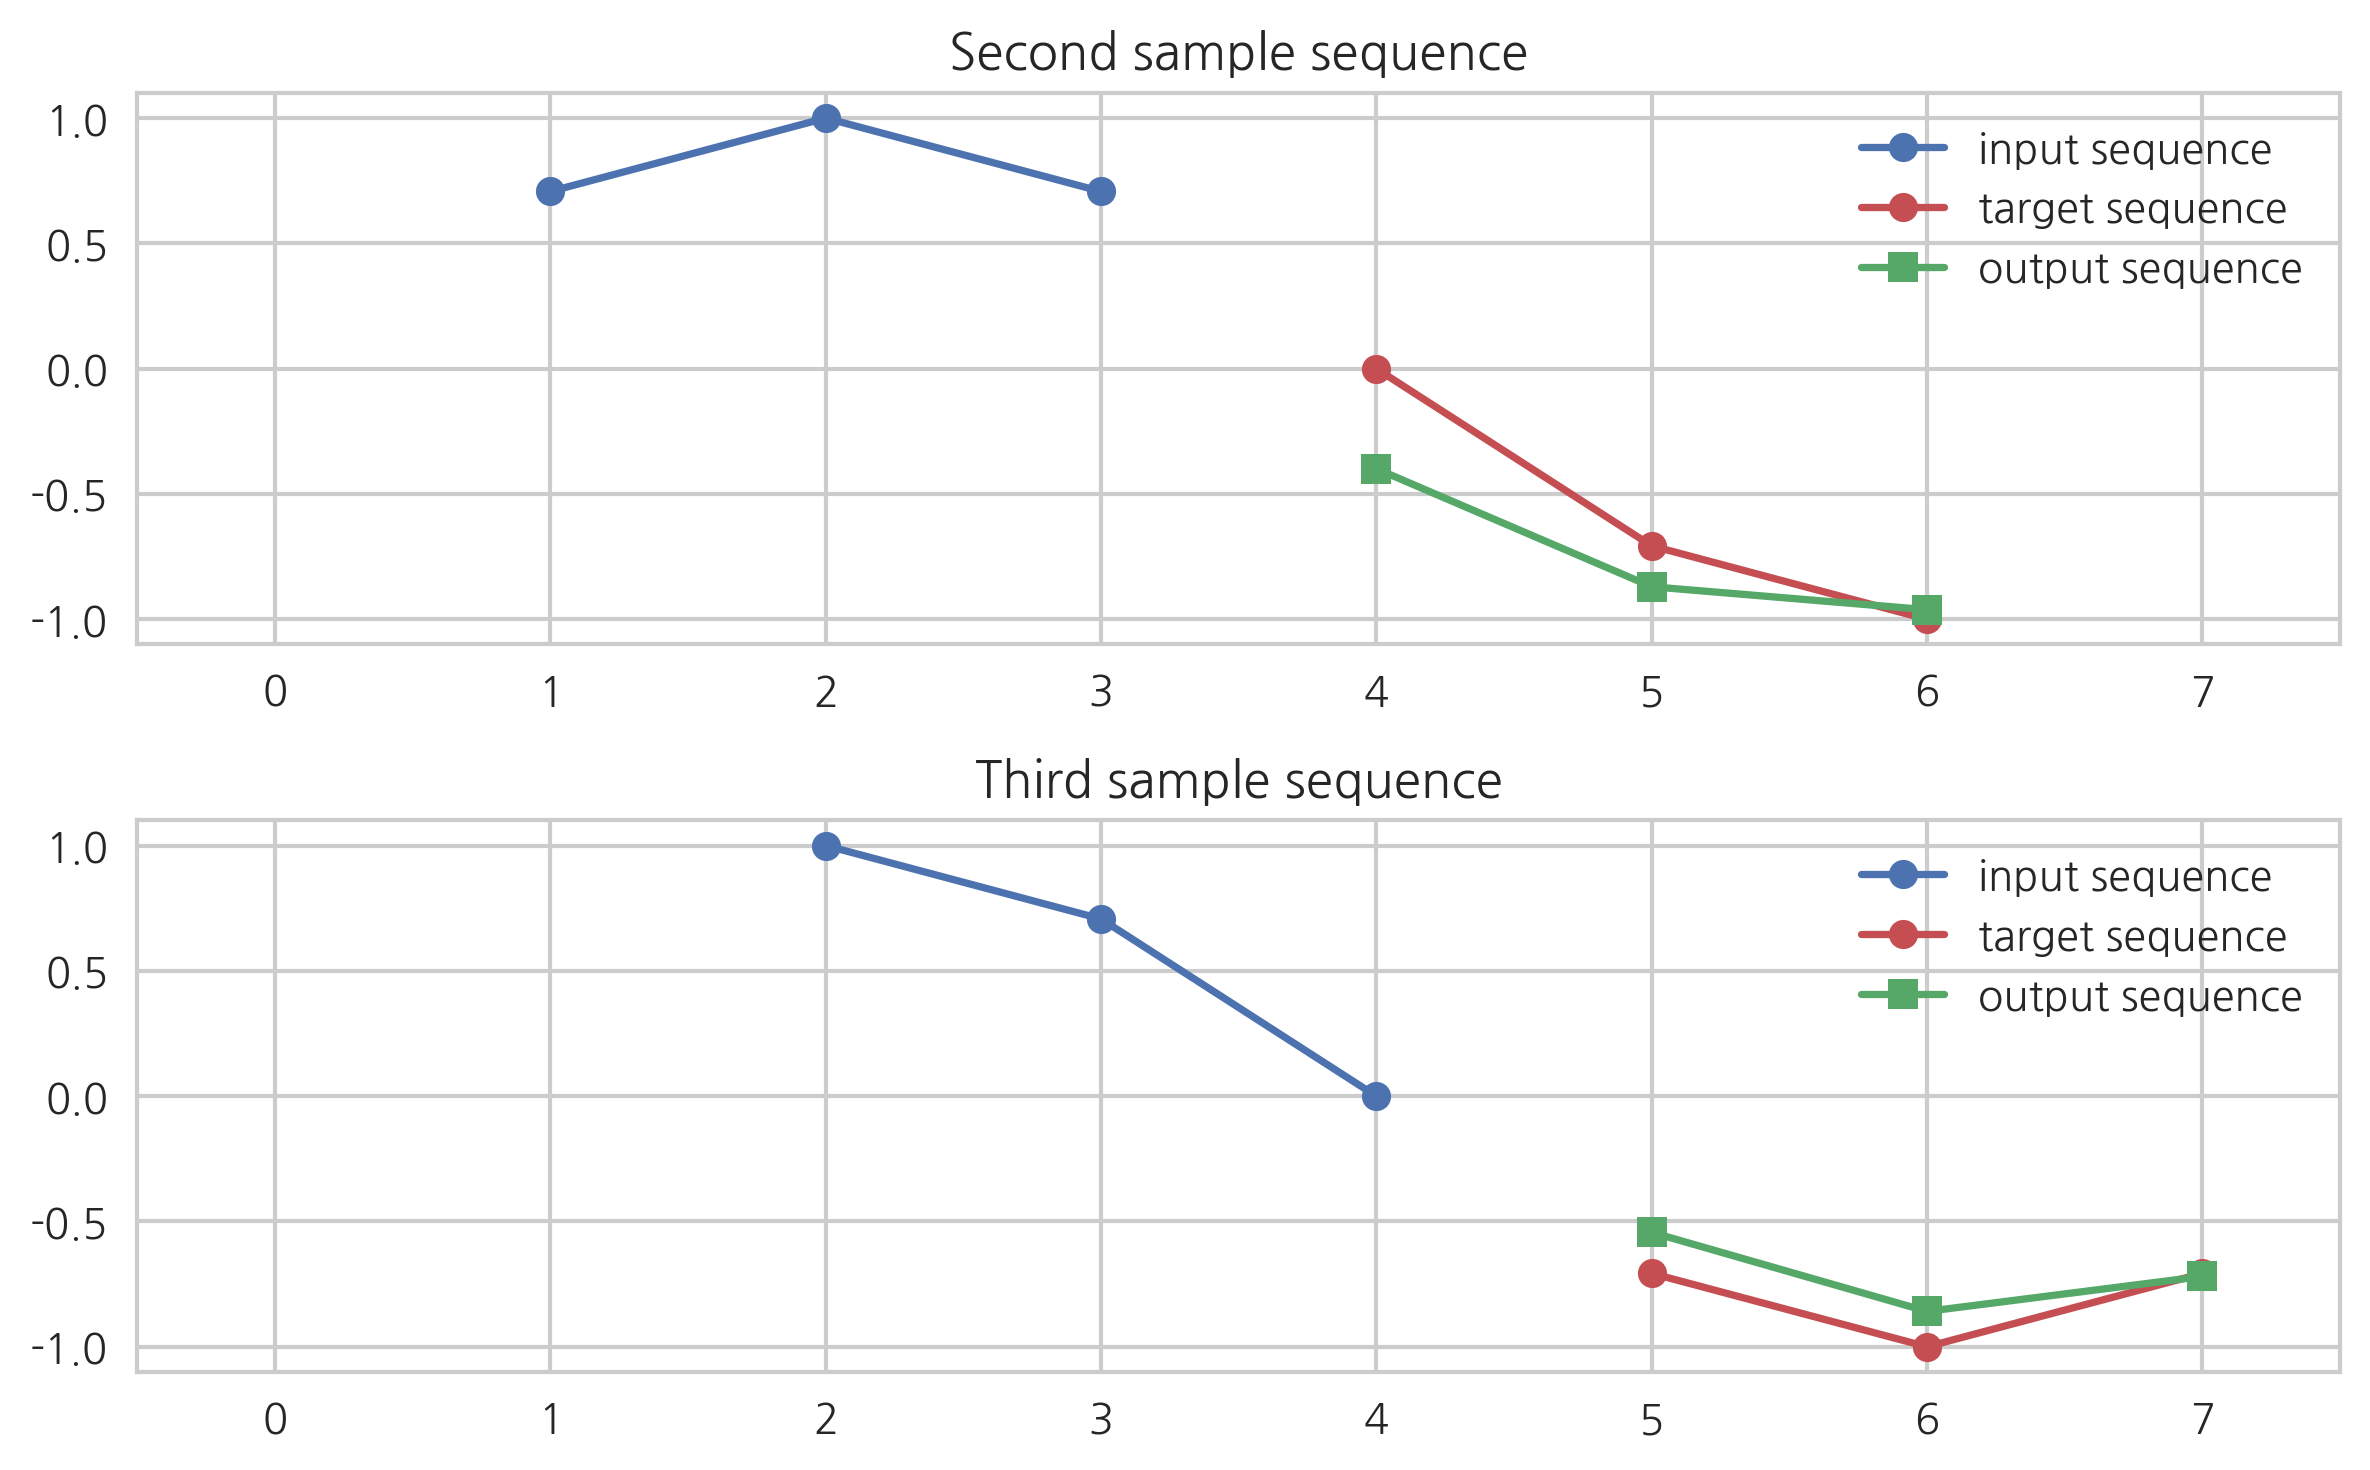

In [25]:
plt.subplot(211)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.plot([4, 5, 6], model2.predict(X_train2[1:2,:,:]).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.subplot(212)
plt.plot([2, 3, 4], X_train2[2].flatten(), 'bo-', label="input sequence")
plt.plot([5, 6, 7], Y_train2[2].flatten(), 'ro-', label="target sequence")
plt.plot([5, 6, 7], model2.predict(X_train2[2:3,:,:]).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Third sample sequence")
plt.tight_layout()
plt.show()